In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [45]:
df = pd.read_csv('housing.csv')

In [46]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,nuisance,view,...,heat_source,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,address,state,zip_code
0,675000.0,4,1.0,1180,7140,1.0,NO,NO,NO,NONE,...,Gas,PUBLIC,1180,0,0,40,1969,"2102 Southeast 21st Court, Renton, Washington ...",Washington,2102
1,920000.0,5,2.5,2770,6703,1.0,NO,NO,YES,AVERAGE,...,Oil,PUBLIC,1570,1570,0,240,1950,"11231 Greenwood Avenue North, Seattle, Washing...",Washington,11231
2,775000.0,3,3.0,2160,1400,2.0,NO,NO,NO,AVERAGE,...,Gas,PUBLIC,1090,1070,200,270,2010,"4079 Letitia Avenue South, Seattle, Washington...",Washington,4079
3,592500.0,2,2.0,1120,758,2.0,NO,NO,YES,NONE,...,Electricity,PUBLIC,1120,550,550,30,2012,"2193 Northwest Talus Drive, Issaquah, Washingt...",Washington,2193
4,625000.0,2,1.0,1190,5688,1.0,NO,NO,YES,NONE,...,Electricity,PUBLIC,1190,0,300,0,1948,"1602 North 185th Street, Shoreline, Washington...",Washington,1602


# Numerical Data

In [47]:
df.select_dtypes(exclude=['object']).head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built
0,675000.0,4,1.0,1180,7140,1.0,1180,0,0,40,1969
1,920000.0,5,2.5,2770,6703,1.0,1570,1570,0,240,1950
2,775000.0,3,3.0,2160,1400,2.0,1090,1070,200,270,2010
3,592500.0,2,2.0,1120,758,2.0,1120,550,550,30,2012
4,625000.0,2,1.0,1190,5688,1.0,1190,0,300,0,1948


In [48]:
num_var = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'sqft_above', 'sqft_basement',
           'sqft_garage', 'sqft_patio']

X_num = df[num_var]

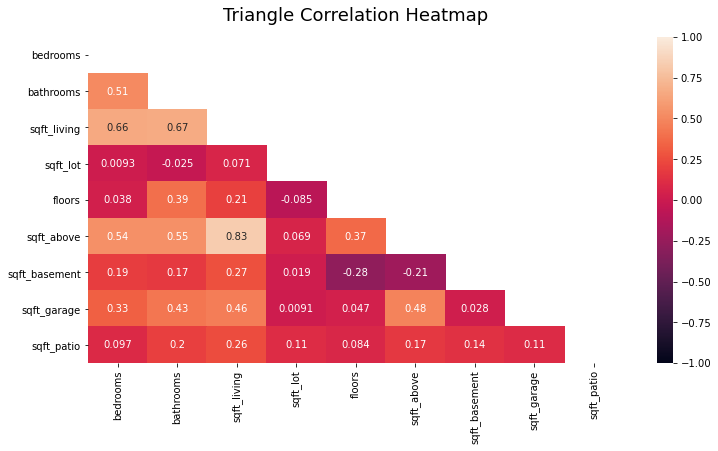

In [49]:
plt.figure(figsize=(12, 6))
# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(X_num.corr(), dtype=bool))
heatmap = sns.heatmap(X_num.corr(), mask=mask, vmin=-1, vmax=1, annot=True)
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

# Non-Numerical  Data

In [6]:
df.select_dtypes(include=['object']).head()

,waterfront,greenbelt,nuisance,view,condition,grade,heat_source,sewer_system,address,state,zip_code
0,NO,NO,NO,NONE,Good,7 Average,Gas,PUBLIC,"2102 Southeast 21st Court, Renton, Washington ...",Washington,2102
1,NO,NO,YES,AVERAGE,Average,7 Average,Oil,PUBLIC,"11231 Greenwood Avenue North, Seattle, Washing...",Washington,11231
2,NO,NO,NO,AVERAGE,Average,9 Better,Gas,PUBLIC,"4079 Letitia Avenue South, Seattle, Washington...",Washington,4079
3,NO,NO,YES,NONE,Average,7 Average,Electricity,PUBLIC,"2193 Northwest Talus Drive, Issaquah, Washingt...",Washington,2193
4,NO,NO,YES,NONE,Average,7 Average,Electricity,PUBLIC,"1602 North 185th Street, Shoreline, Washington...",Washington,1602


# Ordinal Data

In [7]:
df['grade'].unique()

array(['7 Average', '9 Better', '8 Good', '6 Low Average', '5 Fair',
       '4 Low', '10 Very Good', '11 Excellent', '3 Poor', '12 Luxury'],
      dtype=object)

In [8]:
from sklearn.preprocessing import OrdinalEncoder

In [9]:
# ordering the grade column

cat_subset = df[['grade']]

grade_order = ['3 Poor', '4 Low', '5 Fair', '6 Low Average', '7 Average', '8 Good', '9 Better', 
               '10 Very Good', '11 Excellent', '12 Luxury']

# reg_grade_order = ['7 Average', '9 Better', '8 Good', '6 Low Average', '5 Fair',
#        '4 Low', '10 Very Good', '11 Excellent', '3 Poor', '12 Luxury']

o_enc = OrdinalEncoder(categories = [grade_order])
o_enc.fit(cat_subset)

OrdinalEncoder(categories=[['3 Poor', '4 Low', '5 Fair', '6 Low Average',
                            '7 Average', '8 Good', '9 Better', '10 Very Good',
                            '11 Excellent', '12 Luxury']])

In [10]:
X_subset_or = pd.DataFrame(o_enc.transform(cat_subset), columns = cat_subset.columns)
X_subset_or

,grade
0,4.0
1,4.0
2,6.0
3,4.0
4,4.0
...,...
16392,4.0
16393,4.0
16394,4.0
16395,5.0


# Nomial Data

In [11]:
df['heat_source'].unique()

array(['Gas', 'Oil', 'Electricity', 'Gas/Solar', 'Other',
       'Electricity/Solar', 'Oil/Solar'], dtype=object)

In [12]:
df['heat_source'].value_counts()

Gas                  10136
Electricity           4403
Oil                   1802
Electricity/Solar       24
Gas/Solar               20
Other                    9
Oil/Solar                3
Name: heat_source, dtype: int64

In [30]:
from sklearn.preprocessing import OneHotEncoder
onehot_enc = OneHotEncoder(sparse=False)
# heat source
nominal_data = ['heat_source','sewer_system','state','waterfront','greenbelt']

# tranforming the nomial subset
X_nom_trans = onehot_enc.fit_transform(df[nominal_data])

X_norm = pd.DataFrame(X_nom_trans, columns = onehot_enc.get_feature_names())

In [31]:
X_norm

,x0_Electricity,x0_Electricity/Solar,x0_Gas,x0_Gas/Solar,x0_Oil,x0_Oil/Solar,x0_Other,x1_PRIVATE,x1_PRIVATE RESTRICTED,x1_PUBLIC,...,x2_Pennsylvania,x2_Texas,x2_Utah,x2_Virginia,x2_Washington,x2_Wisconsin,x3_NO,x3_YES,x4_NO,x4_YES
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16392,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
16393,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
16394,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
16395,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


In [28]:
onehot_enc.inverse_transform(X_nom_trans)

array([['Gas', 'PUBLIC', 'Washington', 'NO', 'NO'],
       ['Oil', 'PUBLIC', 'Washington', 'NO', 'NO'],
       ['Gas', 'PUBLIC', 'Washington', 'NO', 'NO'],
       ...,
       ['Oil', 'PUBLIC', 'Washington', 'NO', 'NO'],
       ['Electricity', 'PUBLIC', 'Washington', 'NO', 'NO'],
       ['Gas', 'PUBLIC', 'Washington', 'NO', 'NO']], dtype=object)

# Adding the Data together

In [51]:
X_all = pd.concat([X_num,X_subset_or],axis=1)

In [52]:
data = pd.concat([df['price'],X_all,X_norm],axis=1)
y = df['price']

In [53]:
# checking if the X has any null values
data.isna().sum().sum()

0

In [54]:
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,sqft_garage,sqft_patio,...,x2_Pennsylvania,x2_Texas,x2_Utah,x2_Virginia,x2_Washington,x2_Wisconsin,x3_NO,x3_YES,x4_NO,x4_YES
0,675000.0,4,1.0,1180,7140,1.0,1180,0,0,40,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,920000.0,5,2.5,2770,6703,1.0,1570,1570,0,240,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,775000.0,3,3.0,2160,1400,2.0,1090,1070,200,270,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,592500.0,2,2.0,1120,758,2.0,1120,550,550,30,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,625000.0,2,1.0,1190,5688,1.0,1190,0,300,0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


In [58]:
# X and Y  variable are created for the model 

y = data["price"]
X = data.drop("price", axis=1)
